# Research Skills: Image Analysis
## Worksheet 1 : Introduction to Images 

Sharon Ong, Department of Cognitive Science and Artificial Intelligence – Tilburg University

In the session, we will learn: 
* How to load, display and save images   
    * load grayscale, load color, display grayscale and display color and breakdown color images 
* Converting RGB images to 
    * HSV images
    * grayscale images
* Image Datatypes
* Image Operations - adding, subtracting, multiplying and dividing images

* Loading a collection of images
* Blending images
* Working with the PIL image library 

In [ ]:
# If you are running worksheets for image analysis for the first time or 
# if a "no module found" error occurs, 

# run this cell. 
# For the next there shouldn't be problems, especially if you run
# the notebooks on your own laptop. However, shall any "no module found" error occur, you can simply copy
# these lines and run them.

!pip install --user imageio
!pip install --user scikit-image

## Entry level 

# 1. Loading, displaying and saving images 

Images are stored as files on the disk, so loading (reading) and writing images from the files are disk I/O operations. There are at least four different libraries with functions for Image I/O operations and image processing capbailities, which are
* scikit-image
* Python Imaging Library (PIL) 
* matplotlib 
* Python-OpenCV 

Let us load, display and save images with scikit-image

## 1.1 Loading an image 
Let's load an image using scikit-image and print some of the properties of the image (width, height, mode, format, and the datatype). 

The following code uses the *imread()* function from scikit-image to read a grayscale image ('moon.tif') and a color image ('4.1.08.tiff') in a numpy ndarray of type uint8 (8-bit unsigned integer).

In [1]:
from skimage import io
import numpy as np
# read grayscale image from disk into a numpy array, provide the correct path 
im_gray = io.imread("images/moon.tif") 
# display the shape (height, width), datatype and format 
print(im_gray.shape, im_gray.dtype, type(im_gray)) 

# read image from disk into a numpy array, provide the correct path 
im_color = io.imread("images/4.1.08.tiff") 
# display the shape (height, width, channel), datatype and format 
print(im_color.shape, im_color.dtype, type(im_color)) 

(800, 690) uint8 <class 'numpy.ndarray'>
(256, 256, 3) uint8 <class 'numpy.ndarray'>


## 1.2 Displaying images 
Let's display the gray image. A new window is created to display each image.  

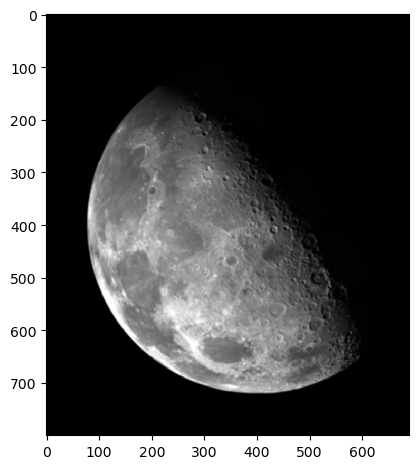

In [2]:
# To display an image loaded with scikit-image library
io.imshow(im_gray)


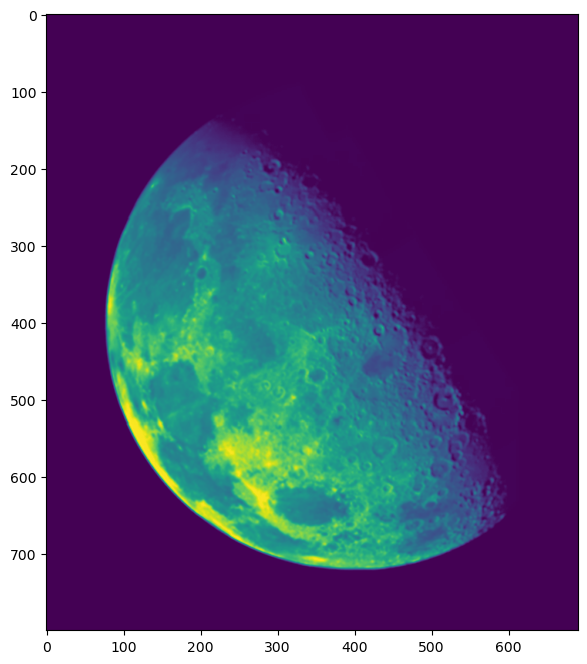

In [3]:
# To display the image with the matplotlib library 
import matplotlib.pylab as plt 
%matplotlib inline         
# create a new figure of where the width = 800 pixels and height = 800 pixels or less 
plt.figure(figsize=(8,8)) 
plt.imshow(im_gray)


For grayscale images, `cmap` parameter transforms the pixel intensities to a colormap. For information on the different colormaps can be found here.  
https://matplotlib.org/3.1.0/gallery/color/colormap_reference.html

To change the default colormap to a grayscale ranging from white and black, try:  

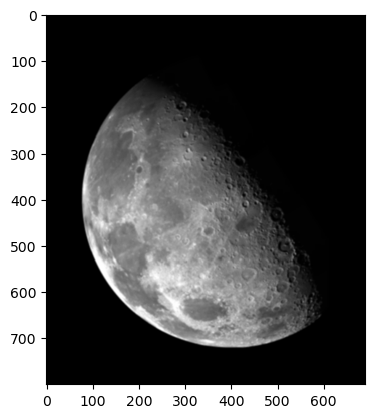

In [4]:
plt.imshow(im_gray,cmap='gray')

The `imshow` function has two parameters `vmin` and `vmax`. All pixels with values less than or equal to the `vmin` parameter are set to black, all pixels with values greater or equal to the `vmax` parameter as white. 

Create code to perform the following
1. Print the maximum and minimum intensities of the grayscale image (im_gray). You can use `np.amin(im_gray)` to find the minimum intensity of `im_gray`. 
2. Display the converted grayscale images setting `cmap='gray'` setting vmin to the minimum intensity value and vmax to the maximum intensity value
3. Change the value of vmin and vmax (e.g. set `vmin=0` and `vmax = 150`). What do you see?  
4. Display the converted grayscale images setting `cmap='gray_r'`. What do you see? 

minimum intensity: 0
minimum intensity: 255


(-0.5, 689.5, 799.5, -0.5)

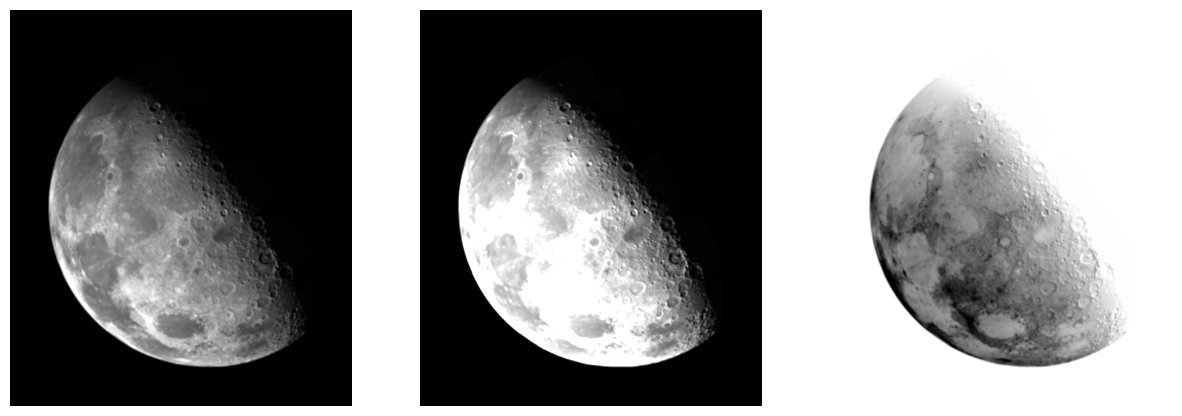

In [8]:
#
# Your code goes here 
#

# 1
print('minimum intensity: ' + str(np.amin(im_gray)))
print('minimum intensity: ' + str(np.amax(im_gray)))

# 2
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(im_gray, cmap='gray', vmin=np.amin(im_gray), vmax=np.amax(im_gray))
plt.axis('off')

# 3
plt.subplot(1,3,2)
plt.imshow(im_gray, cmap='gray', vmin=0, vmax=150)
plt.axis('off')

# 4
plt.subplot(1,3,3)
plt.imshow(im_gray, cmap='gray_r')
plt.axis('off')



The following code displays the color image within the notebook with the matplotlib library

(-0.5, 255.5, 255.5, -0.5)

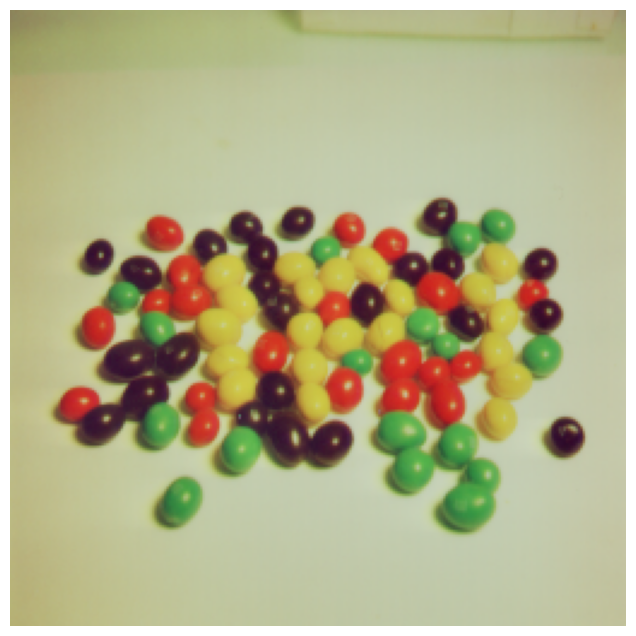

In [9]:
import matplotlib.pylab as plt 
%matplotlib inline         
# create a new figure of where the width = 800 pixels and height = 800 pixels or less 
plt.figure(figsize=(8,8)) 
plt.imshow(im_color)
plt.axis('off')

Display the RGB image as well as red, blue and green channels in a subplot. Label the RGB image as 
'Color Image' and the other three images are 'Red Channel', 'Blue Channel' and 'Green Channel'. 

Text(0.5, 1.0, 'blue channel')

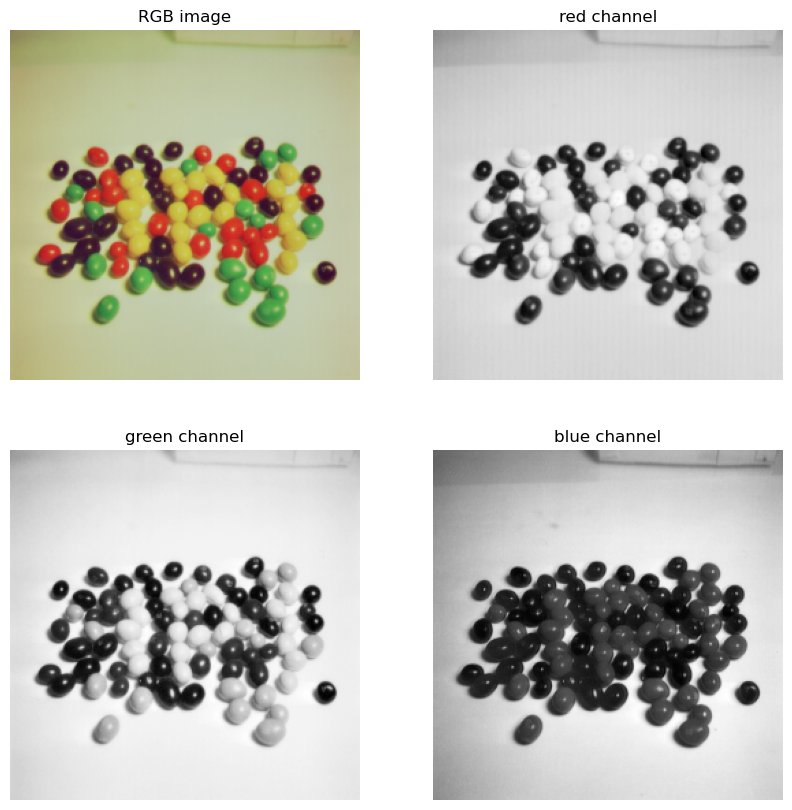

In [22]:
#
# Your code goes here 
#

red_channel = im_color[:,:,0]
green_channel = im_color[:,:,1]
blue_channel = im_color[:,:,2]

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(im_color)
plt.axis('off')
plt.title('RGB image')
plt.subplot(2,2,2)
plt.imshow(red_channel, cmap='gray')
plt.axis('off')
plt.title('red channel')
plt.subplot(2,2,3)
plt.imshow(green_channel, cmap='gray')
plt.axis('off')
plt.title('green channel')
plt.subplot(2,2,4)
plt.imshow(blue_channel, cmap='gray')
plt.axis('off')
plt.title('blue channel')


## 1.3 Saving the image 
The folliwng code shows how you can write images to disk. When the code runs successfully, image files will be created in the directory you specified.  

In [23]:
# writing a grayscale image to disk with the sckit-image library  
io.imsave("images/gray_image.jpg",im_gray)

# writing an color image to disk with the sckit-image library  
io.imsave("images/color_image.jpg",im_color)

# writing an image (blue channel) to disk with the sckit-image library  
io.imsave("images/blue_ch_image.jpg",im_color[:,:,2])

# 2. Image Histograms
We can check the distribution of grayscale intensity values in an entire image with image histograms. For example, we can estimate background values, determining thresholds, and visualize the effect of contrast adjustments on the image. The following code displays intensity histograms. 

This means that the original data values, will be assigned to a bin into wich they fit according to their size. The original values will be replaced by values representing the corresponding intervals. The function `plt.hist` allows you to specify the number of bins to quantize the data. Binning is a form of quantization. The following code loads an image and displays the intensity histogram with a blue `facecolor` and a transparency value of (`alpha = 0.5`). 
1. Reduce the number of bins to 10 and increase the value of alpha to 0.8. 
2. Load a color image  (eg. im3 = io.imread("images/4.1.05.tiff")) 
3. Using subplots, display the image in one plot (figure) and its 3 image histograms (one of each channel). Change the facecolor of first image histogram to red (facecolor='r'), the second one to green and the third one to blue. 

(256, 256)


Text(0.5, 1.0, 'Blue channel histogram')

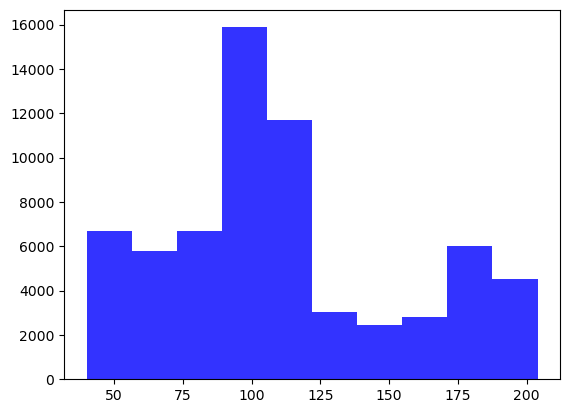

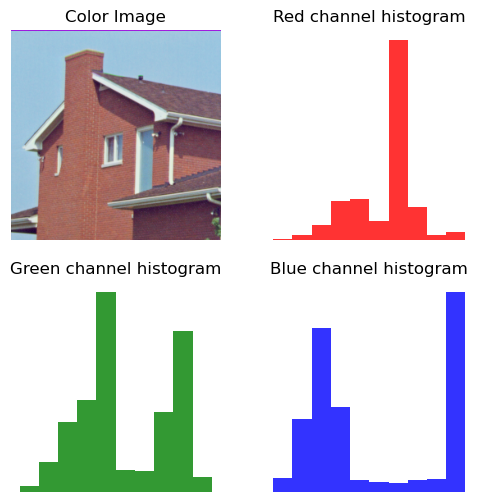

In [38]:
from skimage.exposure import histogram 
from skimage import io, color
import matplotlib.pyplot as plt
%matplotlib inline

im = io.imread('images/rice.png')     # read image from disk, provide the correct path 
print(im.shape)
im_color = io.imread('images/4.1.05.tiff')     # read image from disk, provide the correct path 

###
##
# Your code goes here 
#
###

# 1.
plt.figure()
plt.hist(im.flatten(), bins = 10, facecolor = 'blue', alpha = 0.8)

# 2
im3 = io.imread("images/4.1.05.tiff")

# 3
plt.figure(figsize=(6,6))
plt.subplot(2,2,1)
plt.imshow(im3)
plt.axis('off')
plt.title('Color Image')
plt.subplot(2,2,2)
plt.hist(im3[:,:,0].flatten(), bins = 10, facecolor = 'red', alpha = 0.8)
plt.axis('off')
plt.title('Red channel histogram')
plt.subplot(2,2,3)
plt.hist(im3[:,:,1].flatten(), bins = 10, facecolor = 'green', alpha = 0.8)
plt.axis('off')
plt.title('Green channel histogram')
plt.subplot(2,2,4)
plt.hist(im3[:,:,2].flatten(), bins = 10, facecolor = 'blue', alpha = 0.8)
plt.axis('off')
plt.title('Blue channel histogram')



# 3. Image Datatypes and Classes 

There are different image types and image classes which can be read and processed in Python.  
Single channel images where each pixel is represented by a single value include: 
* (Grayscale( Intensity images: 
  * uint16 [0, 65535] (CCD cameras on microscopes, medical images, some satellite images) 
  * uint8 [0, 255] (From your standard digital camera) 
  * float64 [$−2^{32}, −2^{32}$] 
* Binary images (black and white)
  * logical, 0 or 1
In multi-channel images, each pixel is represented by a tuple of values, such as: 
* 3 channel images, for example:  
    * RGB images where each pixel is represented by 3 values representing red, green, and blue channel color  
    * HSV images where each pixel is represented by 3 values representing hue, saturation and value channel 
* Four-channel images, for example:
    * RGBA images where each pixel is represented by 4 values representing red, green, blue channel colors and alpha (the transparency)

## 3.1 Converting RGB images to HSV images
HSV images comprises of three channels 
* h (hue or color: dominant wave length of reflected light),
* s (saturation or how much the color is mixed with white) and 
* v (value or brightness or how much the color is mixed with black) 
The HSV model describes colors in a similar manner to how the human eye tends to perceive colors. An colored RGB image can be converted into an HSV image using the hsv2rgb() function from the scikit-image color module.  The following code converts an rgb to a hsv image. 

In [39]:
from skimage import io, color
im = io.imread("images/4.1.08.tiff")     # read image from disk, provide the correct path 
print(im.shape, im.dtype, type(im)) # (362, 486, 3) uint8 <class 'numpy.ndarray'> 
imhsv = color.rgb2hsv(im) # from RGB to HSV color space # change the saturation

(256, 256, 3) uint8 <class 'numpy.ndarray'>


Display the HSV image as well as hue, saturation and value channels in a subplot. Label each image with correct the HSV band 

Text(0.5, 1.0, 'Value channel histogram')

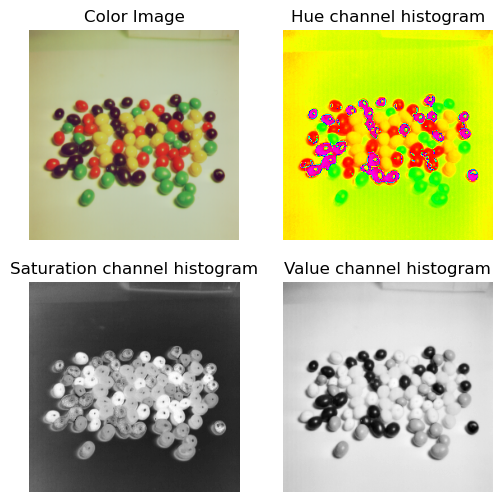

In [48]:
#
# Your code goes here 
#

hue_channel = imhsv[:,:,0]
saturation_channel = imhsv[:,:,1]
value_channel = imhsv[:,:,2]




plt.figure(figsize=(6,6))
plt.subplot(2,2,1)
plt.imshow(im)
plt.axis('off')
plt.title('Color Image')
plt.subplot(2,2,2)
plt.imshow(hue_channel, cmap = 'hsv')
plt.axis('off')
plt.title('Hue channel histogram')
plt.subplot(2,2,3)
plt.imshow(saturation_channel, cmap = 'gray')
plt.axis('off')
plt.title('Saturation channel histogram')
plt.subplot(2,2,4)
plt.imshow(value_channel, cmap = 'gray')
plt.axis('off')
plt.title('Value channel histogram')



## 3.2 Converting RGB images to grayscale 
The following code show how you can convert an RGB image to a grayscale image with different Python libraries. 

In [49]:
# load an image as grayscale with PIL 
from skimage import io, color
import numpy as np

# convert an image to grayscale with sckit-image 
imSK = io.imread("images/tilburg_700.jpg")     # read image from disk, provide the correct path 
imSKgray = color.rgb2gray(imSK)
print(imSKgray.shape, imSKgray.dtype, type(imSKgray)) 

(450, 700) float64 <class 'numpy.ndarray'>


## 3.3 Datatypes
Images read from disk in the form of an unsigned integer ($uint16$ denotes 16-bit unsigned integer, and $uint8$ denotes 8-bit unsigned integer). However, some mathematical operations that involve a decimal point, such as log) can only be done with arrays of type $float$. The following code first loads the image from disk and then converts it from $uint8$ to $float$.


In [50]:
from skimage import io, color
im = io.imread("images/tilburg_700.jpg")     # read image from disk, provide the correct path 
print(im.shape, im.dtype, type(im)) 
print('minimum intensity: ', np.amin(im)) #print out the minimum intensity
print('maximum intensity: ', np.amax(im)) #print out the maximum intensity

imf = im.astype(float)
print(imf.shape, imf.dtype, type(imf)) 
print('minimum intensity: ', np.amin(imf)) #print out the minimum intensity
print('maximum intensity: ', np.amax(imf)) #print out the maximum intensity

(450, 700, 3) uint8 <class 'numpy.ndarray'>
minimum intensity:  0
maximum intensity:  255
(450, 700, 3) float64 <class 'numpy.ndarray'>
minimum intensity:  0.0
maximum intensity:  255.0


Many Python image processing operations operate under the assumption that the image is scaled to the range [0,1]. For instance, when imshow displays an float image, it displays an intensity of 0 as black and 1 as white. We can automatically create a scaled double image using rgb2gray. 

# 4. Image Operations 
You can add, subtract, multiple and divide images of the same size. 

## 4.1 Adding two images
Let's compare the results of adding two images. The following code loads two RGB images 

In [51]:
from skimage import io, color, data
import numpy as np
import matplotlib.pylab as plt 
%matplotlib inline        

# load two RGB images 
im1 = io.imread('images/4.1.05.tiff'); 
im2 = io.imread('images/4.1.08.tiff'); 

We will compare the results of adding unsigned integer images with images in the 'float' datatypes. 

1. Print the datatype, (e.g im1.dtype for im1), the maximum and minimum intensity of im1 and im2 
2. Add the two unsigned integer images (e.g im3 = im1 + im2) 
3. Print the datatype, (e.g im1.dtype for im1), the maximum and minimum intensity of added image
4. Display the RGB image and the red, blue and green channels separately  
5. Convert im1 and im2 to float and add the two images 
6. Print the datatype, (e.g im1.dtype for im1), the maximum and minimum intensity of resultant image of 5.
7. Divide the resultant image by the maximum intensity 
8. Display the image obtained in 7 and its red, blue and green channels separately  

1
uint8 0 246
uint8 9 220
3
uint8 0 255
6
float64 51.0 451.0


Text(0.5, 1.0, 'blue channel')

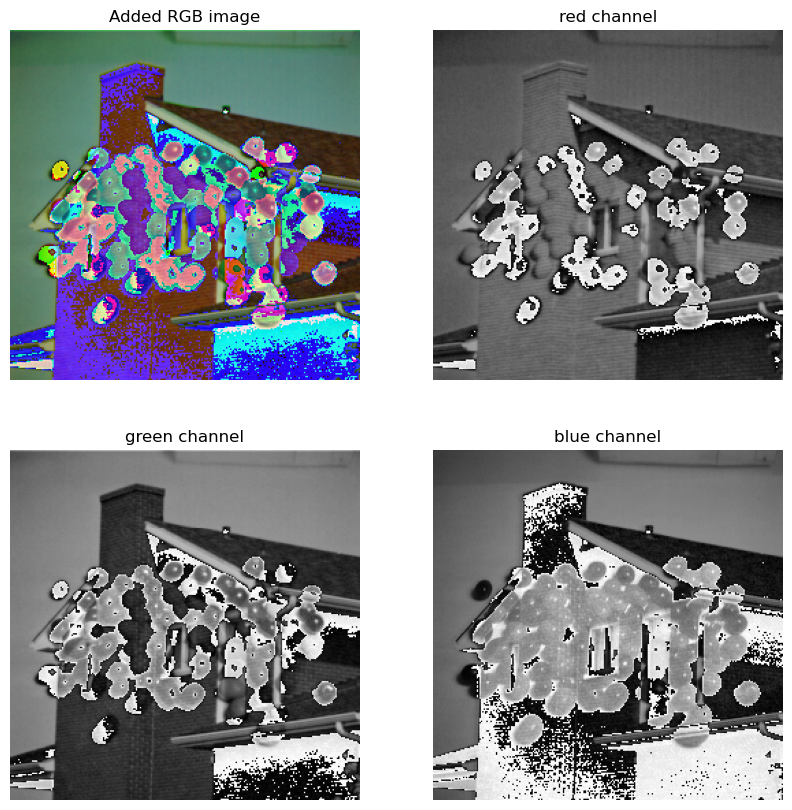

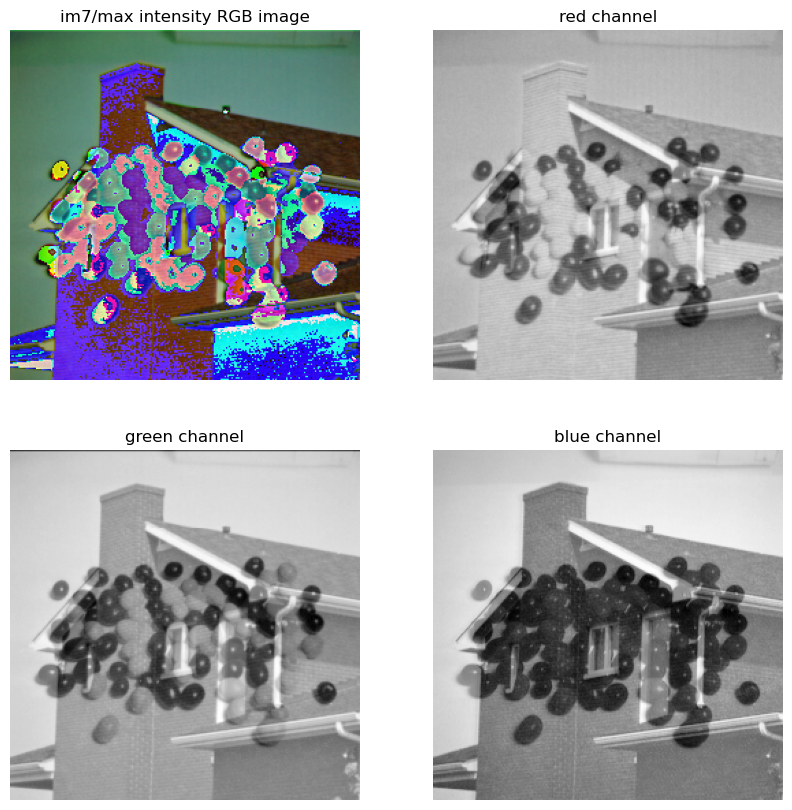

In [55]:
####
#
# Your code goes here 

# 1
print(1)
print(im1.dtype, np.amin(im1), np.amax(im1))
print(im2.dtype, np.amin(im2), np.amax(im2))

# 2
im3 = im1 + im2

# 3
print(3)
print(im3.dtype, np.amin(im3), np.amax(im3))

# 4
red_channel = im3[:,:,0]
green_channel = im3[:,:,1]
blue_channel = im3[:,:,2]

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(im3)
plt.axis('off')
plt.title('Added RGB image')
plt.subplot(2,2,2)
plt.imshow(red_channel, cmap='gray')
plt.axis('off')
plt.title('red channel')
plt.subplot(2,2,3)
plt.imshow(green_channel, cmap='gray')
plt.axis('off')
plt.title('green channel')
plt.subplot(2,2,4)
plt.imshow(blue_channel, cmap='gray')
plt.axis('off')
plt.title('blue channel')

# 5
im1f = im1.astype(float)
im2f = im2.astype(float)
im5 = im1f + im2f

# 6
print(6)
print(im5.dtype, np.amin(im5), np.amax(im5))

# 7
im7 = im5 / np.amax(im5)

# 8
red_channel = im7[:,:,0]
green_channel = im7[:,:,1]
blue_channel = im7[:,:,2]

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(im3)
plt.axis('off')
plt.title('im7/max intensity RGB image')
plt.subplot(2,2,2)
plt.imshow(red_channel, cmap='gray')
plt.axis('off')
plt.title('red channel')
plt.subplot(2,2,3)
plt.imshow(green_channel, cmap='gray')
plt.axis('off')
plt.title('green channel')
plt.subplot(2,2,4)
plt.imshow(blue_channel, cmap='gray')
plt.axis('off')
plt.title('blue channel')


## 4.2 Subtract two images 
Let's compare the results of subtracting an image by another images. Perform an image subtraction with the same images as in 3.1

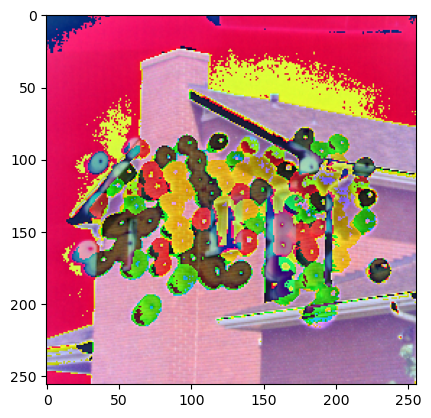

In [56]:
####
#
# Your code goes here 
#
###

im4 = im1 - im2 
plt.imshow(im4)

# Advanced level

# 5. Loading a collection of images  
Use the scikit-image library's functions (e.g. io.ImageCollection) to read a collection of images and display them as a montage. 
In other words, display the images using subplots where each subplot shows one image. You will need to set the number of rows or columns in the subplot such that all the images are displayed. 
https://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html

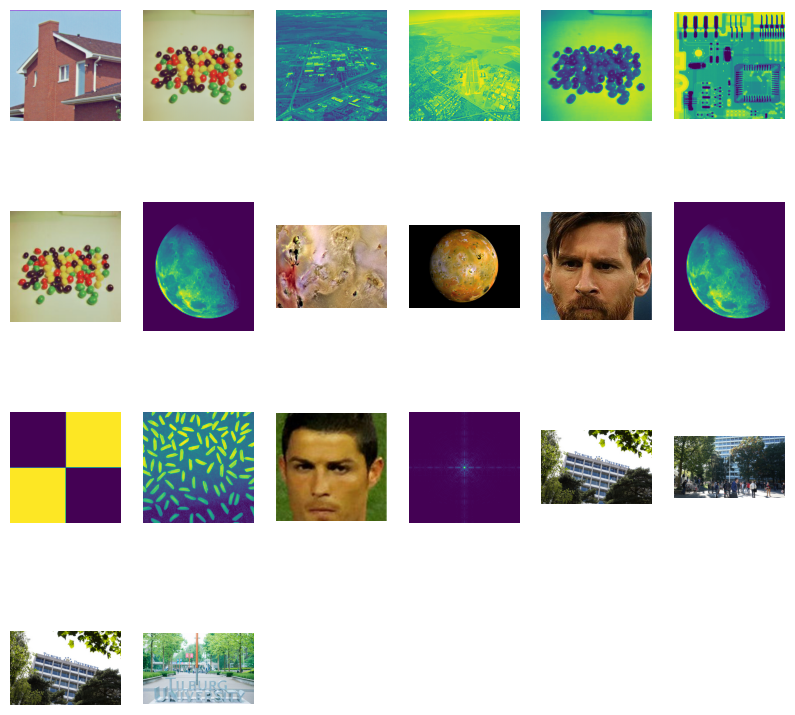

In [61]:
###
#
# Your code goes here 
#
###

ic = io.ImageCollection('images/*.*')
plt.figure(figsize=(10,10))
counter = 1
for img in ic:
    plt.subplot(4,6,counter)
    counter += 1
    plt.imshow(img)
    plt.axis('off')

# 6. Blend two images (alpha blending) 

You can create a new image by interpolating between two given images (of the same size and same mode) by using constant alpha. 
This is known as image morphing or alpha blending of two images using cross dissolving.  The value alpha typically ranges between 0 and 1.  

        output = im1 * (1.0 - alpha) + im2 * alpha

The following code creates space for a large figure and loads an image of Messi (im1) and an image of Ronaldo (im2). 

In [62]:
plt.figure(figsize=(18,15)) 
im1 = io.imread("images/messi.jpg");
im2 = io.imread("images/ronaldo.jpg");

<Figure size 1800x1500 with 0 Axes>

Start with one face image (e.g the face of Messi) and end up with another image (the face of Ronaldo) by varying the values of alpha in a for loop. Eg: 

        for alpha in np.linspace(0,1,20):   

Display the output image for each alpha value.  

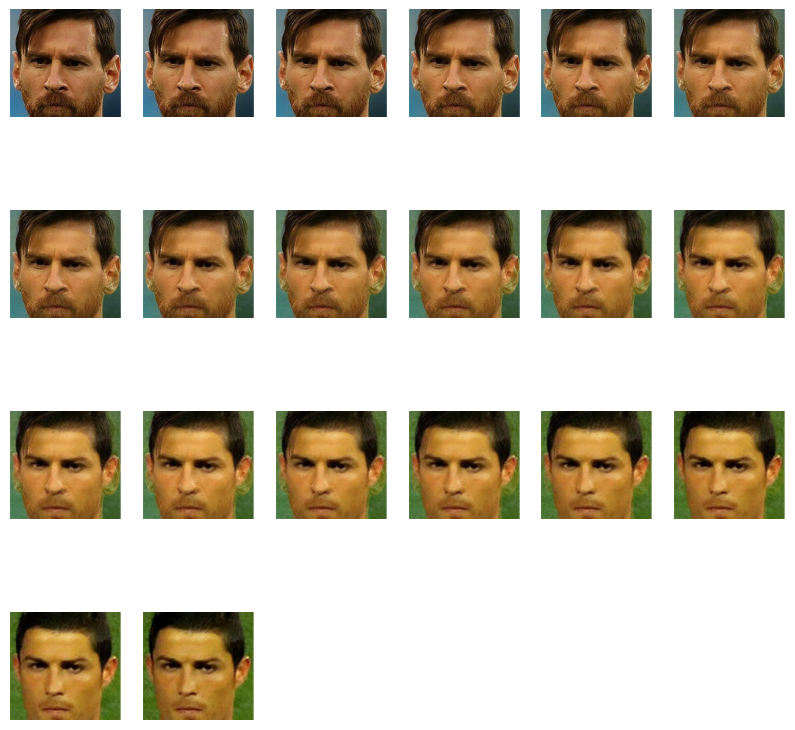

In [65]:
###
#
# Your code goes here 
#
###

plt.figure(figsize=(10,10))
counter = 1
for alpha in np.linspace(0,1,20):
    plt.subplot(4,6,counter)
    counter += 1
    output = im1 * (1.0 - alpha) + im2 * alpha
    output = output/output.max()
    plt.imshow(output)
    plt.axis('off')

Append the output (blended) images and create a gif file from all the output images. 

In [67]:
###
#
# Your code goes here 
#
###

import imageio

m_r_collection = []
counter = 1
for alpha in np.linspace(0,1,20):
    counter += 1
    output = im1 * (1.0 - alpha) + im2 * alpha
    m_r_collection.append(output.astype('uint8'))

print(len(m_r_collection))
imageio.mimsave('messi_ronaldo.gif', m_r_collection, duration = 1)

20


# 7. Image I/O operations with the Python Imaging Library (PIL) 
The following code loads images with the PIL library. You will see that the PIL loads the image as a `PIL.PngImagePlugin.JpegImageFile` object while the other libraries load the images as arrays. 

In [68]:
## Loading an image with PIL 
from PIL import Image
import numpy as np
# read the image from the correct path
imPIL = Image.open("images/tilburg_694.jpg") 
# display the properties of the image  
print(imPIL.width, imPIL.height, imPIL.mode, imPIL.format, type(imPIL))



694 462 RGB JPEG <class 'PIL.JpegImagePlugin.JpegImageFile'>


Let's display the images. A new window is created to display each image.  

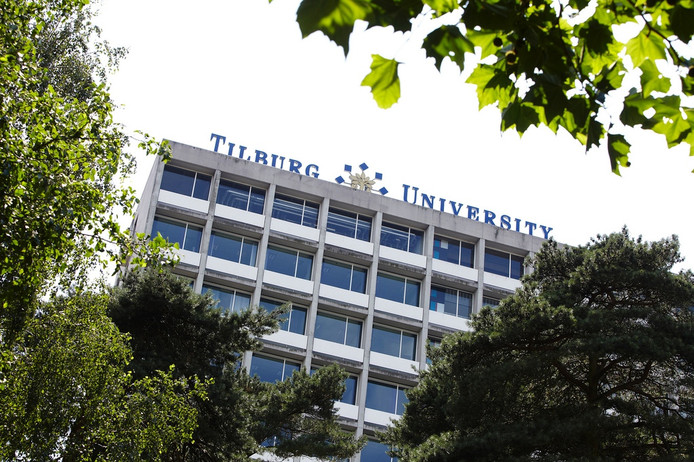

In [69]:
import matplotlib.pylab as plt 
import numpy as np 

# To display the PIL image with the PIL library
imPIL.show() 

You can also use the IPython Public API (Application Programming Interface) for displaying images in the notebook. The function $display()$ takes in a PIL Image object. 

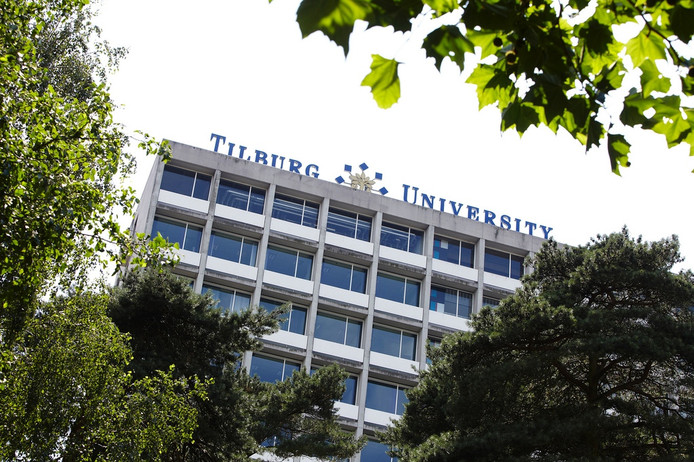

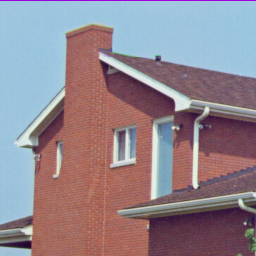

In [70]:
import IPython.display
IPython.display.display(imPIL)
# convert numpy image to PIL Image object for display  
IPython.display.display(Image.fromarray(im_color))

The folliwng code  shows how you can write images to disk. When the code runs successfully, image files will be created in the directory you specified. 

In [71]:
imPIL.save('images/tilburgPIL.jpg')

The split() operation from PIL can be used separate the image into bands of red, green and blue.
The following code loads a RGB image as a PIL object splits into multiple channels 

In [72]:
imPIL = Image.open("images/4.1.08.tiff") 
im_red, im_green,im_blue = imPIL.split()

The following code converts the image to grayscale with 

In [73]:
imgGray = imPIL.convert('L')

Compare grayscale conversion of two different libraries (PIL and scikit-learn). Take a color image of your choice,
1. convert the color image to grayscale with the PIL. Call this grayscale image as img1 
2. convert the color image to grayscale with the scikit-learn. Call this grayscale image as img2  (***  then ask to either multiply the skimage with 255 or noramlize the PIL to between 0 and 1
3. subtract img1 with img2
4. convert img1 and img2 to 'float', create another image which is the absolute difference of img1 and img2,  and display the results 

If these two libraries return the same grayscale image, you will get a black image (of zeros) as the result. Are they the same? 

uint8 24 208
float64 19.6726 209.70440000000002
float64 -12.96120000000002 15.026800000000009
float64 -12.96120000000002 15.026800000000009


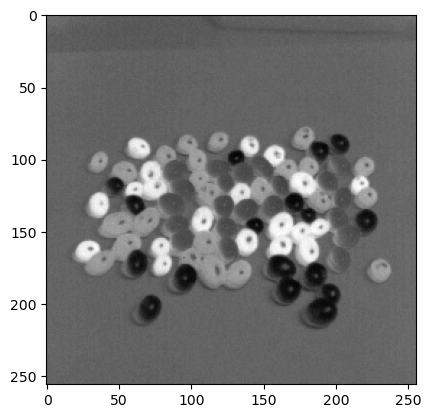

In [77]:
###
#
# Your code goes here 
#
###

# 1
imPIL = Image.open("images/4.1.08.tiff") 
img1 = imPIL.convert('L')
img1 = np.asarray(img1)
print(img1.dtype, np.amin(img1), np.amax(img1))

# 2
imSK = io.imread("images/4.1.08.tiff")
img2 = color.rgb2gray(imSK)
img2 = img2 * 255
print(img2.dtype, np.amin(img2), np.amax(img2))

# 3
img3 = img1 - img2
print(img3.dtype, np.amin(img3), np.amax(img3))

# 4
img1f = img1.astype(float)
img2f = img2.astype(float)
img3abs = img1f - img2f
print(img3abs.dtype, np.amin(img3abs), np.amax(img3abs))

plt.imshow(img3, cmap = 'gray')